**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.18.0
Keras version: 3.8.0


**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
print(kaggle_credentails)


{'username': 'shreeradha123', 'key': 'fc07d1d08d47b58509f031fc59d51f34'}


In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
print("Kaggle Username:", os.environ['KAGGLE_USERNAME'])
print("Kaggle API Key:", os.environ['KAGGLE_KEY'])


Kaggle Username: shreeradha123
Kaggle API Key: fc07d1d08d47b58509f031fc59d51f34


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
!ls

drive	     plantvillage-dataset.zip  Strawberry___Leaf_scorch_test.jpeg
kaggle.json  sample_data


In [ ]:
# !cp class_indices.json '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Blueberry___healthy']
38
['Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Blueberry___healthy']
38
['Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Blueberry___healthy']


**Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['8c5181ab-8b06-41a8-9b26-b3be052dcea1___Mt.N.V_HL 8905.JPG', 'fc24bccd-6d46-48b8-9dad-99f7bc0e3eec___Mt.N.V_HL 6031.JPG', 'b07129a6-b8b0-4715-b76f-f89bd40c6770___Mt.N.V_HL 8994.JPG', '5a726e51-407a-4a85-a671-65a82d275fda___Mt.N.V_HL 8961.JPG', '1f9ead63-93e5-4379-885b-b2b57352202b___Mt.N.V_HL 8938.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


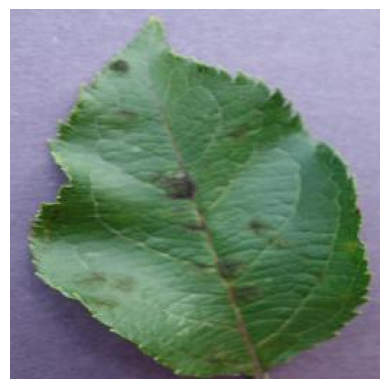

In [ ]:
image_path='/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [ ]:
# Image Parameters
img_size = 128
batch_size = 32

**Train Test Split**

In [ ]:


# Image Data Generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of data for validation

    # Data Augmentation Parameters
    # rotation_range=40,  # Increased rotation range
    # width_shift_range=0.3,  # Increased shift
    # height_shift_range=0.3,
    # shear_range=0.3,
    # zoom_range=0.3,
    # horizontal_flip=True,
    # fill_mode='nearest'
)


In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
print(train_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
print(validation_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

**Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image size
img_size = 128  # Change if needed

# Model Definition
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), kernel_initializer="he_normal",
                        activation=None, kernel_regularizer=l2(0.0005), input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D(2, 2, padding="same"))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_normal",
                        activation=None, kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D(2, 2, padding="same"))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_normal",
                        activation=None, kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D(2, 2, padding="same"))

# Fourth Convolutional Block
model.add(layers.Conv2D(256, (3, 3), kernel_initializer="he_normal",
                        activation=None, kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D(2, 2, padding="same"))

# Extra Convolutional Layer for Better Feature Extraction
model.add(layers.Conv2D(512, (3, 3), kernel_initializer="he_normal",
                        activation=None, kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.MaxPooling2D(2, 2, padding="same"))

# **Fixed Shape Issue: Use GlobalAveragePooling Instead of Flatten**
model.add(layers.GlobalAveragePooling2D())  # Dynamic, avoids shape mismatch

# Fully Connected Layer 1
model.add(layers.Dense(512, activation=None, kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.4))

# Fully Connected Layer 2
model.add(layers.Dense(256, activation=None, kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.4))

# Output Layer with Label Smoothing
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Learning Rate Scheduler
lr_schedule = ExponentialDecay(initial_learning_rate=0.0003, decay_steps=1000, decay_rate=0.96, staircase=True)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

# Compile Model
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Summary
model.summary()






/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 126, 126, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 61, 61, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 29, 29, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 13, 13, 256)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,16

 Total params: 1,979,366 (7.55 MB)

 Trainable params: 1,975,846 (7.54 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [ ]:
# model summary
#model.summary()

In [ ]:
# Compile the Model
#model.compile(optimizer='adam',
    #          loss='categorical_crossentropy',
      #        metrics=['accuracy'])

**Model training**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.3363 - loss: 4.1967 - val_accuracy: 0.7055 - val_loss: 2.7936
Epoch 2/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - accuracy: 0.6166 - loss: 2.9513 - val_accuracy: 0.8160 - val_loss: 2.2404
Epoch 3/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.7243 - loss: 2.4231 - val_accuracy: 0.8544 - val_loss: 1.9305
Epoch 4/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.7894 - loss: 2.0643 - val_accuracy: 0.8705 - val_loss: 1.7344
Epoch 5/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.8161 - loss: 1.8500 - val_accuracy: 0.8894 - val_loss: 1.5827
Epoch 6/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.8509 - loss: 1.6729 - val_accuracy: 0.9202 - val_loss: 1.4283
Epoch 7/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.8673 - loss: 1.5574 - val_accuracy: 0.9379 - val_loss: 1.3261
Epoch 8/40
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 66s 49ms/step - accuracy: 0.8842 -

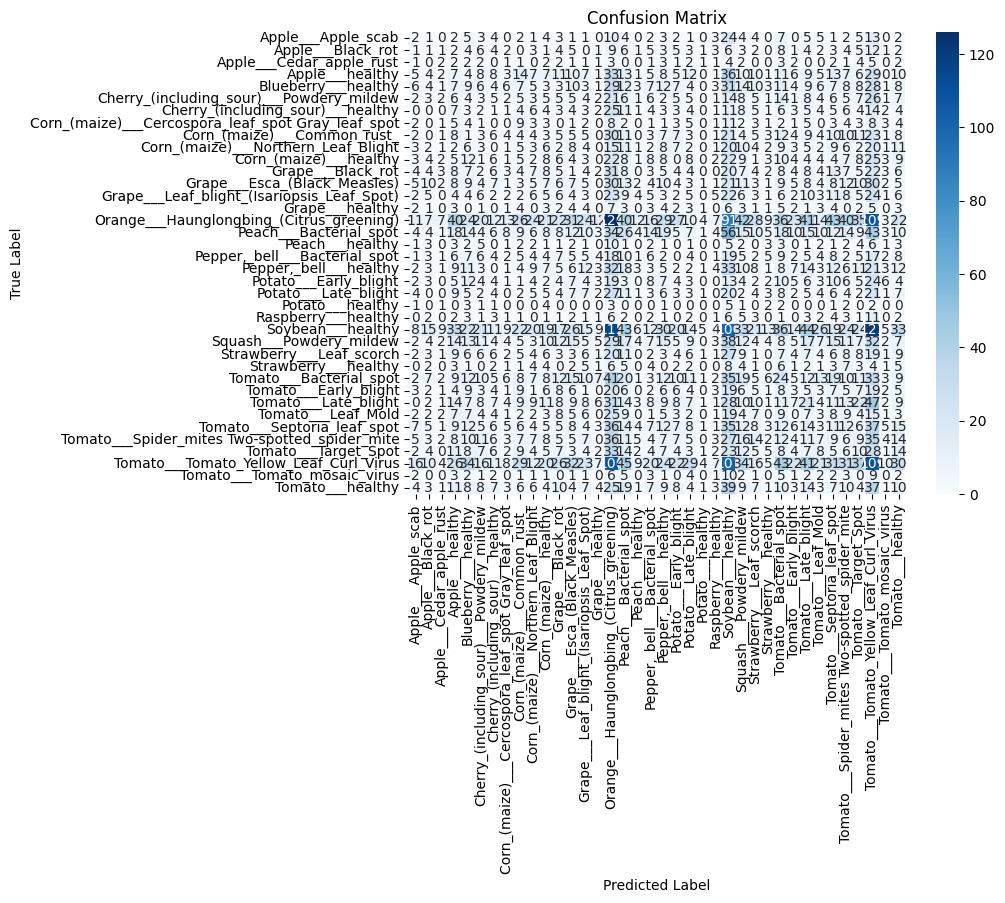

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02       126
                                 Apple___Black_rot       0.01      0.01      0.01       124
                          Apple___Cedar_apple_rust       0.04      0.04      0.04        55
                                   Apple___healthy       0.02      0.02      0.02       329
                               Blueberry___healthy       0.03      0.03      0.03       300
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       210
                 Cherry_(including_sour)___healthy       0.01      0.01      0.01       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       102
                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       238
               Corn_(maize)___Northern_Leaf_Blight     

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=40,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)
# **Compute Confusion Matrix after Model Training**
y_true = validation_generator.classes  # Actual labels
y_pred_probs = model.predict(validation_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9833 - loss: 0.8694
Validation Accuracy: 98.34%


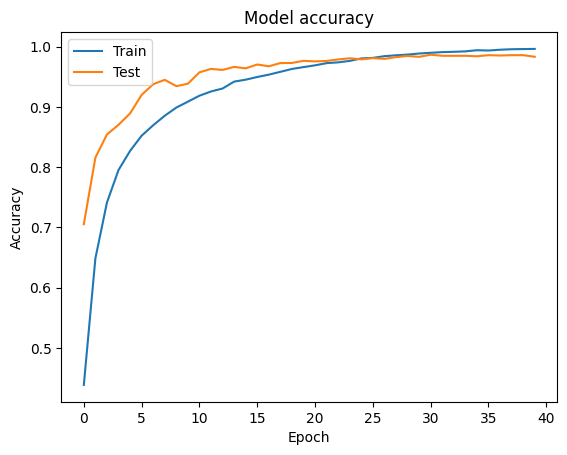

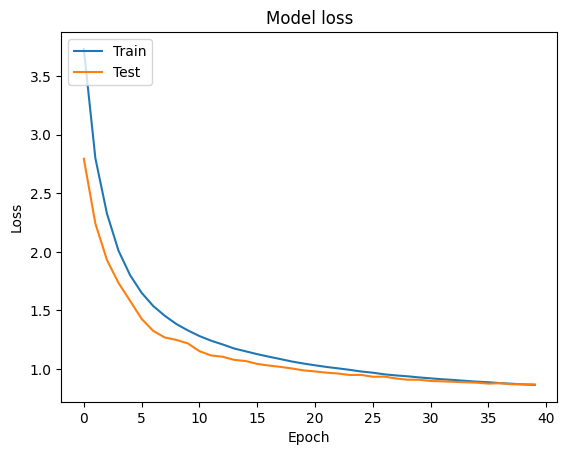

In [ ]:
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
!ls


 class_indices.json	 plantvillage-dataset.zip
 drive			 sample_data
 kaggle.json		 Strawberry___Leaf_scorch_test.jpeg
'plantvillage dataset'


In [ ]:
# Example Usage
#image_path ='/content/plantvillage dataset/test_apple_black_rot.JPG'
#image_path = '/content/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_final_masked.jpg'#Cherry_(including_sour)___healthy
#image_path ='/content/plantvillage dataset/segmented/Grape___Esca_(Black_Measles)/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399_final_masked.jpg'#grape escape
#image_path='/content/plantvillage dataset/segmented/Raspberry___healthy/00a3fc0e-64cc-4e35-ac2f-aef04fda9b22___Mary_HL 9177_final_masked.jpg'#raspberry healthy
image_path='/content/Strawberry___Leaf_scorch_test.jpeg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class Name: Tomato___Leaf_Mold


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp class_indices.json '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction'
model.save('/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/my_model.h5')

cp: cannot create regular file '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction': No such file or directory


In [ ]:
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction"
!cp kaggle.json "/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/"
!cp Strawberry___Leaf_scorch_test.jpeg "/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/"


**Save the model to Google drive or local**

In [ ]:
#model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [ ]:
#model.save('plant_disease_prediction_model.h5')

In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
# !pip install streamlit pyngrok

In [ ]:
# import os
# import json
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# import streamlit as st
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Specify the path to your model and class indices in Google Drive
# model_path = '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/my_model.h5'
# class_indices_path = '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/class_indices.json'

# # Load the pre-trained model
# model = tf.keras.models.load_model(model_path)

# # Load the class names
# with open(class_indices_path, 'r') as f:
#     class_indices = json.load(f)

In [ ]:

# # Function to Load and Preprocess the Image using Pillow
# def load_and_preprocess_image(image_path, target_size=(224, 224)):
#     img = Image.open(image_path)
#     img = img.resize(target_size)
#     img_array = np.array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = img_array.astype('float32') / 255.
#     return img_array

# # Function to Predict the Class of an Image
# def predict_image_class(model, image_path, class_indices):
#     preprocessed_img = load_and_preprocess_image(image_path)
#     predictions = model.predict(preprocessed_img)
#     predicted_class_index = np.argmax(predictions, axis=1)[0]
#     predicted_class_name = class_indices[str(predicted_class_index)]
#     return predicted_class_name

# # Streamlit App
# st.title('Plant Disease Classifier')

# # File uploader
# uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# if uploaded_file is not None:
#     # Save the uploaded file temporarily
#     image_path = '/content/uploaded_image.jpg'
#     with open(image_path, 'wb') as f:
#         f.write(uploaded_file.getbuffer())

#     # Preprocess and predict
#     if os.path.exists(image_path):
#         prediction = predict_image_class(model, image_path, class_indices)
#         st.success(f'Prediction: {prediction}')
#         st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
#     else:
#         st.error("Image processing failed.")
# else:
#     st.write("Please upload an image to get a prediction.")

In [ ]:
# from pyngrok import ngrok

# # Set your ngrok auth token
# !ngrok authtoken your_ngrok_token

# # Start Streamlit and ngrok
# !streamlit run /content/app.py &>/content/logs.txt &
# public_url = ngrok.connect(port='8501')
# print('Streamlit app is live at:', public_url)

In [ ]:
# %%writefile /content/app.py
# import os
# import json
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# import streamlit as st
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Load model and class indices
# model_path = '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/my_model.h5'
# class_indices_path = '/content/drive/MyDrive/Colab Notebooks/Plant_Disease_Prediction/class_indices.json'
# model = tf.keras.models.load_model(model_path)
# with open(class_indices_path, 'r') as f:
#     class_indices = json.load(f)

# # Functions
# def load_and_preprocess_image(image_path, target_size=(224, 224)):
#     img = Image.open(image_path)
#     img = img.resize(target_size)
#     img_array = np.array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = img_array.astype('float32') / 255.
#     return img_array

# def predict_image_class(model, image_path, class_indices):
#     preprocessed_img = load_and_preprocess_image(image_path)
#     predictions = model.predict(preprocessed_img)
#     predicted_class_index = np.argmax(predictions, axis=1)[0]
#     predicted_class_name = class_indices[str(predicted_class_index)]
#     return predicted_class_name

# # Streamlit App
# st.title('Plant Disease Classifier')
# uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# if uploaded_file is not None:
#     image_path = '/content/uploaded_image.jpg'
#     with open(image_path, 'wb') as f:
#         f.write(uploaded_file.getbuffer())
#     if os.path.exists(image_path):
#         prediction = predict_image_class(model, image_path, class_indices)
#         st.success(f'Prediction: {prediction}')
#         st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
#     else:
#         st.error("Image processing failed.")
# else:
#     st.write("Please upload an image to get a prediction.")

In [ ]:
# !streamlit run app.py &
